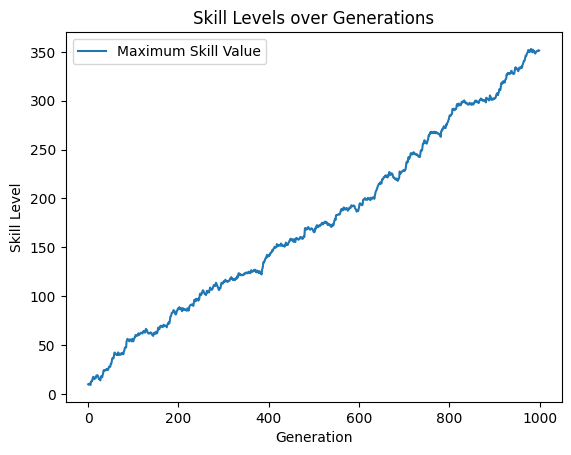

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the parameters for the distribution
num_agents = 40  # Number of agents in the population
num_generations = 1000  # Number of generations

# Generate the initial skills for the first generation
skills = np.random.uniform(low=0, high=10, size=num_agents)

# Track the maximum skill value for each generation
max_skills = []

# Perform the copying process for each generation
for generation in range(num_generations):

    # Determine the target 
    target = max(skills)
    
    max_skills.append(target)  # Track the maximum skill value

    # Generate a random value from the Gumbel distribution
    # The Gumbel distribution is characterized by two parameters: loc (location) and scale. 
    # The loc parameter sets the location or position of the distribution's mode, while the scale parameter controls the spread or dispersion of the distribution.

    skills = np.random.gumbel(loc=target-4, scale=1, size=num_agents)
        
    

# Plot the skill levels as a function of generation
plt.plot(range(num_generations), max_skills, label='Maximum Skill Value')
plt.xlabel('Generation')
plt.ylabel('Skill Level')
plt.title('Skill Levels over Generations')
plt.legend()
plt.show()

In [18]:
def henrich_model(N, generations, dispersion, deviance):

    # Generate the initial skills for the first generation
    skills = np.random.uniform(low=0, high=10, size=N)

    # Track the maximum skill value for each generation
    max_skills = []

    # Perform the copying process for each generation
    for generation in range(generations):
        # Determine the target for the Gumbel distribution in this generation
        target = max(skills)
        
        max_skills.append(target)  # Track the maximum skill value

        # Generate a random value from the Gumbel distribution
        # The Gumbel distribution is characterized by two parameters: loc (location) and scale. 
        # The loc parameter sets the location or position of the distribution's mode, while the scale parameter controls the spread or dispersion of the distribution.

        skills = np.random.gumbel(loc=target-deviance, scale=dispersion, size=N)
        #skills = np.random.normal(loc=target-deviance, scale=dispersion, size=N)

    return max_skills

In [19]:
# model exploration
# look what patterns result from different values for N 

Ns = range(1, 25, 5)
henrich = {}
for N in Ns:
    henrich[N] = henrich_model(N, 100, dispersion = 2, deviance = 2)

{1: [4.340983035115954,
  2.853356124149902,
  1.071979102579243,
  0.12029223490304686,
  0.9421196153445233,
  -3.6450572839453814,
  -7.004899368551274,
  -6.5140581256757075,
  -9.961472633298191,
  -13.023815365233757,
  -15.902557178520949,
  -18.682668775248292,
  -15.752804639803298,
  -20.910749274854258,
  -23.57251424990887,
  -24.326763847297315,
  -24.055810775998275,
  -26.14300777326369,
  -27.514658610197262,
  -31.70488855900458,
  -31.059658463949475,
  -33.161169847094556,
  -36.69435297039913,
  -35.85637783683252,
  -38.523956666929074,
  -43.57647787257514,
  -41.81054803358252,
  -40.63326882464916,
  -43.19536325183527,
  -45.51163212880312,
  -48.23756468727375,
  -47.1915185216808,
  -44.26910760340894,
  -42.95477613412811,
  -46.20157874013523,
  -49.07435356842821,
  -50.24117646374809,
  -47.40260748644263,
  -47.94507262165388,
  -50.35100339888673,
  -48.719256261892646,
  -46.48452110546256,
  -48.061656023540394,
  -44.60712780664813,
  -47.88763607133

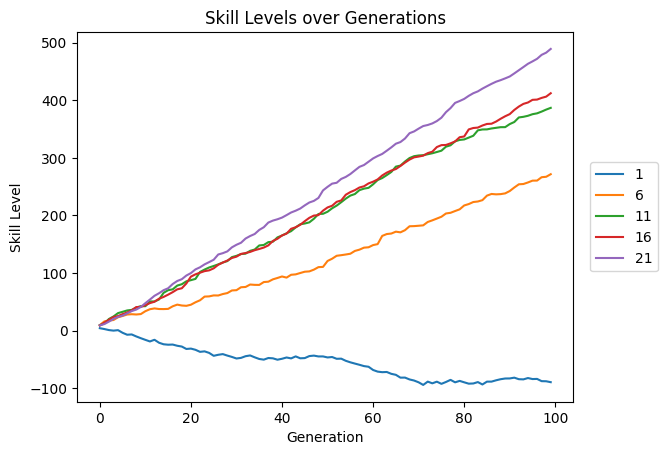

In [20]:
# Plot each list in the dictionary as a line plot
for key, values in henrich.items():
    sns.lineplot(x=range(len(values)), y=values, label=key)

# Set x and y labels
plt.xlabel('Generation')
plt.ylabel('Skill Level')
plt.title('Skill Levels over Generations')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')

# Show the plot
plt.show()